In [5]:
!mkdir data
!mkdir data/meshes
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V4vOD9TevqZoZCtD70Yz7y62zunGoAU-' -O data/meshes/meshes.tar.xz
!tar -xvf data/meshes/meshes.tar.xz -C data/meshes
!rm data/meshes/meshes.tar.xz

mkdir: cannot create directory ‘data’: File exists


mkdir: cannot create directory ‘data/meshes’: File exists
--2024-08-18 14:23:19--  https://docs.google.com/uc?export=download&id=1V4vOD9TevqZoZCtD70Yz7y62zunGoAU-
Resolving docs.google.com (docs.google.com)... 142.251.132.14, 2800:3f0:4001:833::200e
Connecting to docs.google.com (docs.google.com)|142.251.132.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1V4vOD9TevqZoZCtD70Yz7y62zunGoAU-&export=download [following]
--2024-08-18 14:23:19--  https://drive.usercontent.google.com/download?id=1V4vOD9TevqZoZCtD70Yz7y62zunGoAU-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.132.1, 2800:3f0:4001:833::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.132.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3423788 (3.3M) [application/octet-stream]
Saving to: ‘data/meshes/meshes.tar.xz’

data/meshes/m

In [6]:
#!pip install numpy
#bibliotecas necessárias para rodar os códigos
!pip install geopandas
!pip install folium

import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point
import geopandas as gpd
import folium
import matplotlib.pyplot as plt



In [7]:
#rj_state = gpd.read_file('/content/data/meshes/RJ_UF_2020/RJ_UF_2020.shp')
#print(rj_state.shape)
rj_state = gpd.read_file('./data/meshes/RJ_Municipios_2020/RJ_Municipios_2020.shp')
print(rj_state.shape)
rj_state.head()

(92, 5)


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.15109 -23.21602, -44.15076..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.12536 -21.60155, -42.12535 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.18387 -22.55144, -42.18349 -22.5..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.03716 -22.16429, -43.03672 -22.1..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91855 -22.81574, -41.91836..."


In [8]:
import re

#rj_city = rj_state[rj_state['NM_UF'].str.contains('rio de janeiro', flags=re.IGNORECASE)]
rj_city = rj_state[rj_state['NM_MUN'].str.contains('rio de janeiro', flags=re.IGNORECASE)]
rj_city

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.56883 -23.08162, -43.56886..."


In [9]:
rj_city.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

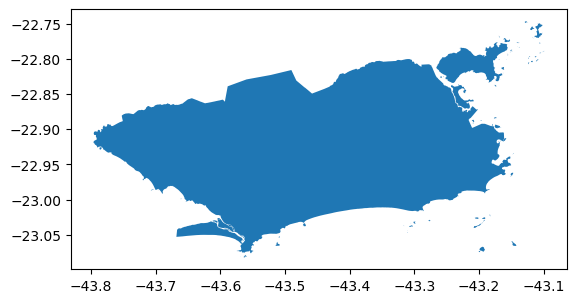

In [10]:
rj_city.plot()

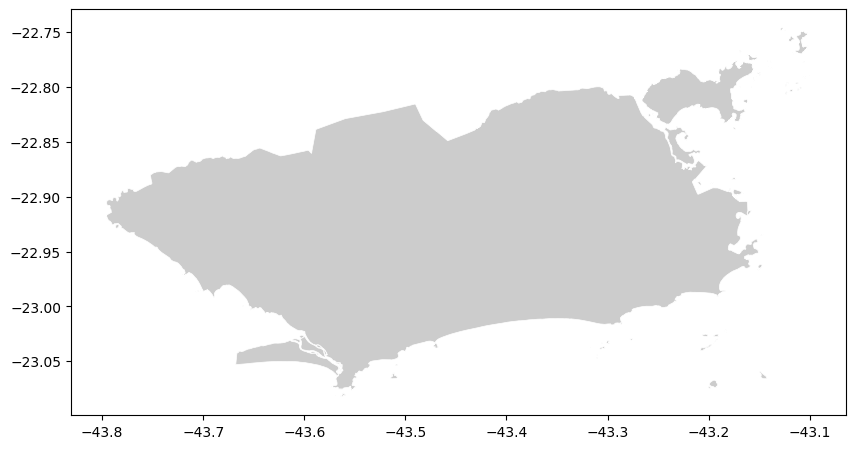

In [11]:
def plot_rj_city():
  plt_args = {'color': '#CCCCCC',
              'edgecolor': 'white',
              'linewidth': 0.5}
  ax = rj_city.plot(figsize=(10,8),
                    alpha=1,
                    **plt_args)
  return ax
ax = plot_rj_city()


## GOES16 Data on AWS

Beginner's guide to GOES-R data - https://www.goes-r.gov/downloads/resources/documents/Beginners_Guide_to_GOES-R_Series_Data.pdf

GOES16 filename convention - https://docs.opendata.aws/noaa-goes16/cics-readme.html



In [12]:
!pip install s3fs

In [13]:
import s3fs
import xarray as xr
import datetime as dt
import argparse

# Nova seção

In [14]:
fs = s3fs.S3FileSystem(anon=True)
product = "ABI-L2-DMWF"
products = fs.ls('s3://noaa-goes16/')

# extraindo os dados da data de inicio e data de fim usando args do python
#parser = argparse.ArgumentParser(description = "Entra com a data de inicio e data de fim. Para colocar a data no formato dd/mm/yyyy ")
#parser.add_argument("datei",type=str,help="data de inicio")
#parser.add_argument("datef",type=str,help="data de fim")
#args = parser.parse_args()
#start_date = dt.date(int((args.datei).split("/")[2]),int((args.datei).split("/")[1])),int(args.datei).split("/")[0]))
#end_date = dt.date(int((args.datef).split("/")[2])),int((args.datef).split("/")[1]),int((args.datef).split("/")[0]))

# extraindo os dados da data de inicio e data de fim de forma normal
start_date = dt.date(2021,1,1)
end_date = dt.date(2021,1,1)
arquivos =[]
data_year_current = start_date.year
if(start_date == end_date):
  days_traveled = 0
else:
  days_traveled = int((str(end_date - start_date)).split(" ")[0])
if(start_date == dt.date(start_date.year,1,1)):
        year_for_days = 0
else:
        year_for_days = int((str(start_date-dt.date(start_date.year,1,1))).split(" ")[0])+1
add_days = 0
for dsp in range(days_traveled+1):
  year_for_days_current = str(year_for_days+add_days)
  for hours in range(24):
      target = f'noaa-goes16/{product}/{data_year_current}/{year_for_days_current}/{str(hours)}'
      files = np.array(fs.ls(target))
      if(len(files)>0):
        for i in range(len(files)):
          print(files)
          filename = files[i].split('/')[-1]
          arquivos.append(filename)
          fs.get(files[i], filename)
          ds = xr.open_dataset(filename)
  if(int(year_for_days_current) == 365):
     data_year_current = int(data_year_current)+1
     add_days = 0
     year_for_days = 1
  else:
    add_days = add_days+1



FileNotFoundError: noaa-goes16/ABI-L2-DMWF/2021/0/0

In [ ]:
listaValoresWind = []
i = 0
def filter_coordinates(ds:xr.Dataset):
  return ds[["wind_speed"]].where(
      (ds['lat'] >= -23.082616) & (ds['lat'] <= -22.768942) &
      (ds['lon'] >= -43.823426) & (ds['lon'] <=  -43.154634),
      drop=True)
for arq in arquivos:
  if i==3:
    break
  ds = xr.open_dataset(arq)
  i+=1






In [ ]:
print("oi")

oi


In [ ]:
# rj = dict()
# rj['coords'] = {'n_lat': -22.768942,
#                 's_lat': -23.082616,
#                 'w_lon': -43.823426,
#                 'e_lon': -43.154634}

# def filter_coordinates(ds:xr.Dataset, coords):
#   return ds['event_energy'].where(
#       (ds['event_lat'] >= coords['s_lat']) & (ds['event_lat'] <= coords['n_lat']) &
#       (ds['event_lon'] >= coords['w_lon']) & (ds['event_lon'] <= coords['e_lon']),
#       drop=True)

def filter_coordinates(ds:xr.Dataset):
  return ds[["wind_speed","temperature","wind_direction"]].where(
      (ds['lat'] >= -23.082616) & (ds['lat'] <= -22.768942) &
      (ds['lon'] >= -43.823426) & (ds['lon'] <=  -43.154634),
      drop=True)
filter_coordinates(ds)
ds["wind_speed"]





NameError: ignored

In [ ]:
# try:
#   ds = filter_coordinates(ds, rj['coords'])
# except ValueError:
#   print('Value Error')

try:
  ds = filter_coordinates(ds)
except ValueError:
  print('Value Error')

In [ ]:
df = ds.to_dataframe()
df


,wind_speed,temperature,wind_direction,lat,lon,time,pressure,local_zenith_angle,solar_zenith_angle,lat_image,lon_image,retrieval_local_zenith_angle
nMeasures,,,,,,,,,,,,
0,NaN,NaN,NaN,-22.868574,-43.616756,2021-04-14 13:00:18.604036992,NaN,44.182777,42.500553,0.0,-75.0,90.0
1,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
2,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
3,NaN,NaN,NaN,-22.964491,-43.282986,2021-04-14 13:00:18.604036992,NaN,44.531719,42.354607,0.0,-75.0,90.0
4,NaN,NaN,NaN,-23.032961,-43.716633,2021-04-14 13:00:18.604036992,NaN,44.195362,42.682274,0.0,-75.0,90.0


In [ ]:
df.rename(columns={'time': 'date'},
          inplace=True)
#df.set_index('data', inplace=True)
df['date'] = df['date'].astype(str)
df

,wind_speed,temperature,wind_direction,lat,lon,date,pressure,local_zenith_angle,solar_zenith_angle,lat_image,lon_image,retrieval_local_zenith_angle
nMeasures,,,,,,,,,,,,
0,NaN,NaN,NaN,-22.868574,-43.616756,2021-04-14 13:00:18.604036992,NaN,44.182777,42.500553,0.0,-75.0,90.0
1,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
2,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
3,NaN,NaN,NaN,-22.964491,-43.282986,2021-04-14 13:00:18.604036992,NaN,44.531719,42.354607,0.0,-75.0,90.0
4,NaN,NaN,NaN,-23.032961,-43.716633,2021-04-14 13:00:18.604036992,NaN,44.195362,42.682274,0.0,-75.0,90.0


In [ ]:
df.columns

Index(['wind_speed', 'temperature', 'wind_direction', 'lat', 'lon', 'date',
       'pressure', 'local_zenith_angle', 'solar_zenith_angle', 'lat_image',
       'lon_image', 'retrieval_local_zenith_angle'],
      dtype='object')

In [ ]:
#df = df.fillna("Não tem valor medido")

In [ ]:
dff = df.iloc[:6,:]
#data_escolhida = "2021-06-14 18:00:19.435857024"
#dff = df[ df["date"] == data_escolhida]
gdf = gpd.GeoDataFrame(dff,
                       geometry=gpd.points_from_xy(dff['lon'],
                                                   dff['lat'],
                                                   crs=rj_city.crs),
                       crs=rj_city.crs)

dff

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wind_speed                    0 non-null      float32
 1   temperature                   0 non-null      float32
 2   wind_direction                0 non-null      float32
 3   lat                           5 non-null      float64
 4   lon                           5 non-null      float64
 5   date                          5 non-null      object 
 6   pressure                      0 non-null      float32
 7   local_zenith_angle            5 non-null      float32
 8   solar_zenith_angle            5 non-null      float32
 9   lat_image                     5 non-null      float32
 10  lon_image                     5 non-null      float32
 11  retrieval_local_zenith_angle  5 non-null      float32
dtypes: float32(9), float64(2), object(1)
memory usage: 428.0+ bytes


In [ ]:
df.head(32)

,wind_speed,temperature,wind_direction,lat,lon,date,pressure,local_zenith_angle,solar_zenith_angle,lat_image,lon_image,retrieval_local_zenith_angle
nMeasures,,,,,,,,,,,,
0,NaN,NaN,NaN,-22.868574,-43.616756,2021-04-14 13:00:18.604036992,NaN,44.182777,42.500553,0.0,-75.0,90.0
1,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
2,NaN,NaN,NaN,-22.961721,-43.359940,2021-04-14 13:00:18.604036992,NaN,44.462883,42.401928,0.0,-75.0,90.0
3,NaN,NaN,NaN,-22.964491,-43.282986,2021-04-14 13:00:18.604036992,NaN,44.531719,42.354607,0.0,-75.0,90.0
4,NaN,NaN,NaN,-23.032961,-43.716633,2021-04-14 13:00:18.604036992,NaN,44.195362,42.682274,0.0,-75.0,90.0


In [ ]:
ax = plot_rj_city()

gdf.plot(column='wind_direction',
         ax=ax,
         legend=True)


NameError: ignored

<Axes: >

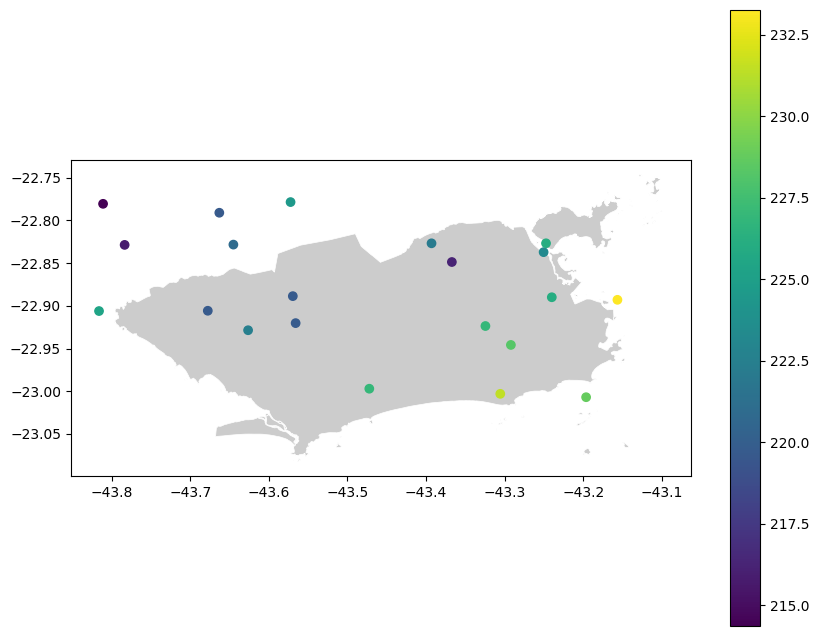

In [ ]:
ax = plot_rj_city()
gdf.plot(column='temperature',
         ax=ax,
         legend=True)


<Axes: >

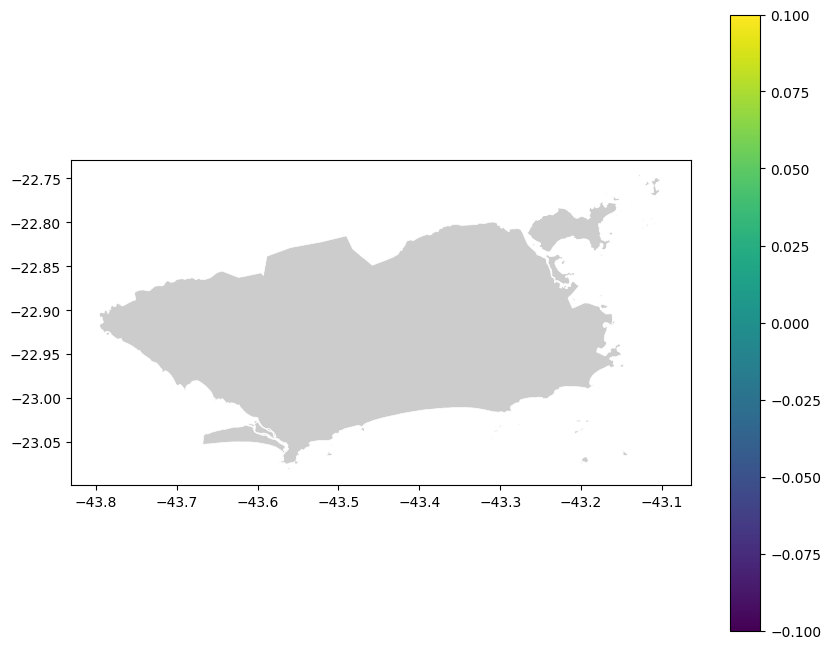

In [ ]:
ax = plot_rj_city()
gdf.plot(column='wind_speed',
         ax=ax,
         legend=True)


In [ ]:
import json
p =gdf.to_json()

In [ ]:
data_dict = json.loads(p)
coord = []

atributo = ["wind_speed","wind_direction","temperature"]
nameAtributo = ["Velocidade do vento","direcao do vento", "temperatura"]
options =0

for k in range(len(data_dict['features'])):
  for t, valor in data_dict['features'][k]['properties'].items():
      if(t == atributo[options]):
          dado = valor
      if (t == "lat"):
            latitude= valor
      if (t == "lon"):
            longitude = valor
  if(dado != None):
    coord.append([latitude,longitude,dado])

m = folium.Map(location=[-22.9035,-43.2096], zoom_start=7)
for b in coord:
  folium.Marker(
    [b[0], b[1]], popup="<i>"+nameAtributo[options]+" é : "+str(b[2])+"</i>", tooltip="É só clicar!"
).add_to(m)

m



# Teste

In [50]:
from netCDF4 import Dataset
import numpy as np

def crop_full_disk(file_path, extent):
    """
    Filter GLM events in a NetCDF file based on the provided coordinate bounds.

    Parameters:
        file_path (str): Path to the input NetCDF file.
        lon_min (float): Minimum longitude of the bounding box.
        lon_max (float): Maximum longitude of the bounding box.
        lat_min (float): Minimum latitude of the bounding box.
        lat_max (float): Maximum latitude of the bounding box.
    
    Returns:
        Dataset: A new in-memory NetCDF Dataset object containing filtered data.
    """
    try:
        lon_min, lat_min, lon_max, lat_max = extent
        
        # Open the original NetCDF file in read mode
        dataset = Dataset(file_path, 'r')
        
        # Get the longitude and latitude variables
        longitudes = dataset.variables['flash_lon'][:]
        latitudes = dataset.variables['flash_lat'][:]
        
        # Create a mask for the bounding box
        mask = (
            (longitudes >= lon_min) & (longitudes <= lon_max) &
            (latitudes >= lat_min) & (latitudes <= lat_max)
        )

        # Create an in-memory NetCDF dataset for filtered data
        filtered_dataset = Dataset('filtered_data.nc', 'w', format='NETCDF4', memory=True)
        
        # Copy global attributes
        filtered_dataset.setncatts({attr: dataset.getncattr(attr) for attr in dataset.ncattrs()})
        
        # Copy dimensions
        for dim_name, dim in dataset.dimensions.items():
            filtered_dataset.createDimension(dim_name, len(dim) if not dim.isunlimited() else None)
        
        # Copy variables and apply the mask
        for var_name, var in dataset.variables.items():
            # Create the new variable in the filtered dataset
            filtered_var = filtered_dataset.createVariable(var_name, var.datatype, var.dimensions)
            
            # Copy variable attributes
            filtered_var.setncatts({attr: var.getncattr(attr) for attr in var.ncattrs()})
            
            # Apply the mask if the variable is related to flash events
            if var_name in ['flash_lon', 'flash_lat']:
                filtered_var[:] = var[:][mask]
            elif 'event_id' in var.dimensions or 'flash_id' in var.dimensions:
                filtered_var[:] = np.compress(mask, var[:], axis=0)
            else:
                filtered_var[:] = var[:]
        
        # Close the original dataset
        dataset.close()
        
        # Return the filtered dataset
        return filtered_dataset
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [51]:
lat_max, lon_max = (
            -21.699774257353113,
            -42.35676996062447,
)  # canto superior direito
lat_min, lon_min = (
            -23.801876626302175,
            -45.05290312102409,
)  # canto inferior esquerdo
extent = [lon_min, lat_min, lon_max, lat_max]

file_name = "../../data/goes16/glm/OR_GLM-L2-LCFA_G16_s20233220027200_e20233220027400_c20233220027419.nc"
# file_name = "../../data/goes16/glm/OR_GLM-L2-LCFA_G16_s20233220000000_e20233220000200_c20233220000221.nc"
filtered_ds = crop_full_disk(file_name, extent)

In [67]:
# ./downloads/OR_GLM-L2-LCFA_G16_s20240390111400_e20240390112000_c20240390112014.nc

lat_max, lon_max = (
            -21.699774257353113,
            -42.35676996062447,
)  # canto superior direito
lat_min, lon_min = (
            -23.801876626302175,
            -45.05290312102409,
)  # canto inferior esquerdo
extent = [lon_min, lat_min, lon_max, lat_max]

file_name = "../../downloads/OR_GLM-L2-LCFA_G16_s20240390111400_e20240390112000_c20240390112014.nc"
filtered_ds = crop_full_disk(file_name, extent)

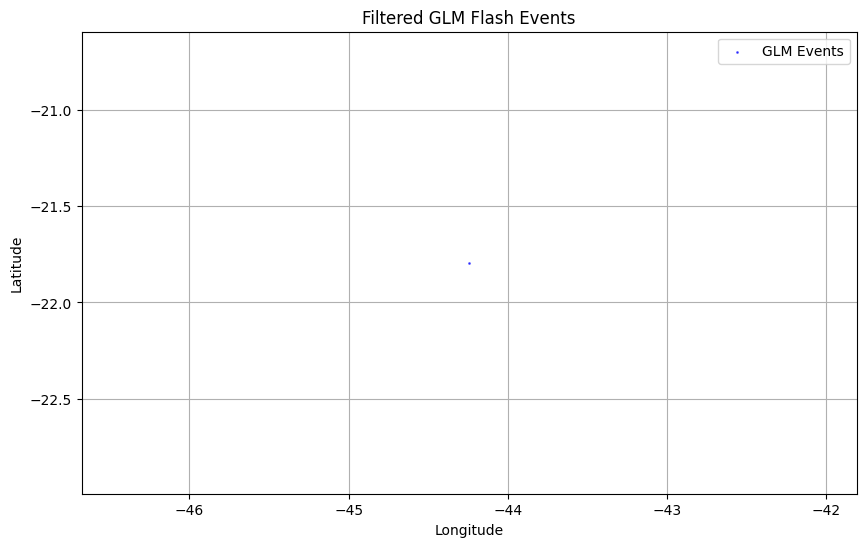

In [68]:
import matplotlib.pyplot as plt

def plot_filtered_dataset(filtered_dataset):
    """
    Plot the filtered GLM events from the in-memory NetCDF dataset.
    
    Parameters:
        filtered_dataset (Dataset): The filtered in-memory NetCDF dataset.
    """
    try:
        # Extract the filtered longitude and latitude variables
        longitudes = filtered_dataset.variables['flash_lon'][:]
        latitudes = filtered_dataset.variables['flash_lat'][:]

        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(longitudes, latitudes, s=1, color='blue', alpha=0.6, label='GLM Events')

        # Add labels, title, and legend
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Filtered GLM Flash Events")
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred while plotting: {e}")

plot_filtered_dataset(filtered_ds)


In [69]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset

def plot_filtered_dataset(filtered_dataset, extent):
    """
    Plot the filtered NetCDF dataset on a map.

    Parameters:
        filtered_dataset (Dataset): The in-memory filtered NetCDF dataset.
        lon_min, lon_max, lat_min, lat_max: Geographic bounds for the map.
    """
    
    lon_min, lat_min, lon_max, lat_max = extent

    # Extract filtered longitude and latitude
    longitudes = filtered_dataset.variables['flash_lon'][:]
    latitudes = filtered_dataset.variables['flash_lat'][:]

    # Initialize the map
    fig, ax = plt.subplots(figsize=(10, 8), 
                           subplot_kw={'projection': ccrs.PlateCarree()})

    # Set map extent
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')
    # ax.add_feature(cfeature.RIVERS, edgecolor='blue')

    # Plot the data points
    sc = ax.scatter(longitudes, latitudes, c='red', s=5, alpha=0.7, transform=ccrs.PlateCarree())

    # Add labels
    plt.title("Filtered GLM Data", fontsize=16)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(sc, label='Flash Data Intensity')  # Optional: Customize this for specific data.

    # Show the map
    plt.show()


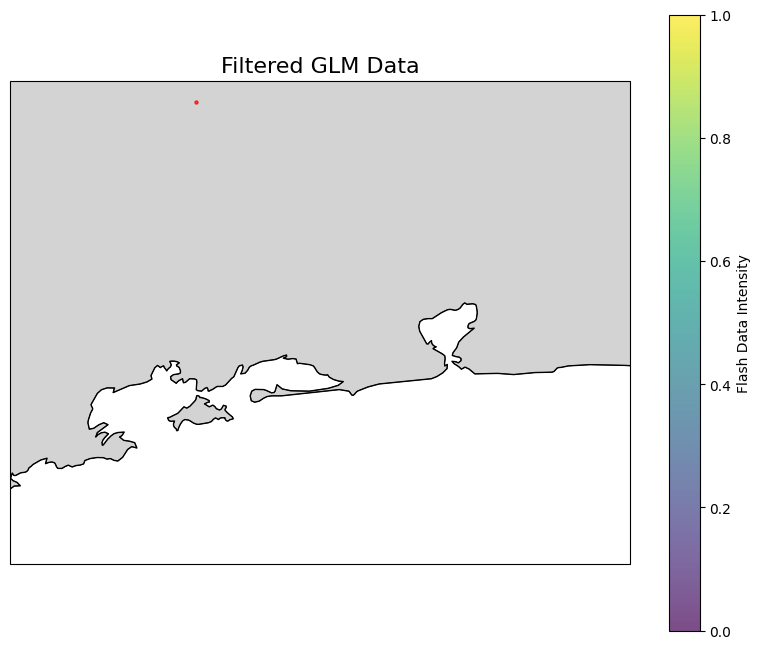

In [70]:
# file_name = "../../data/goes16/glm/OR_GLM-L2-LCFA_G16_s20233220027200_e20233220027400_c20233220027419.nc"
# filtered_ds = crop_full_disk(file_name, extent)
plot_filtered_dataset(filtered_ds, extent)

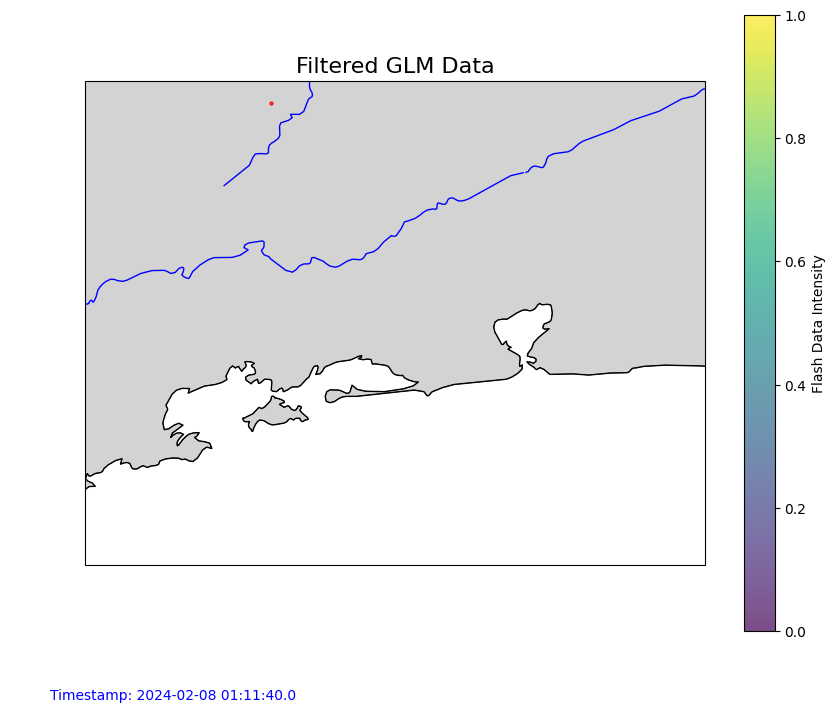

In [71]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset

def plot_filtered_dataset(filtered_dataset, extent):
    """
    Plot the filtered NetCDF dataset on a map and include the file timestamp.

    Parameters:
        filtered_dataset (Dataset): The in-memory filtered NetCDF dataset.
        lon_min, lon_max, lat_min, lat_max: Geographic bounds for the map.
    """

    lon_min, lat_min, lon_max, lat_max = extent

    # Extract filtered longitude and latitude
    longitudes = filtered_dataset.variables['flash_lon'][:]
    latitudes = filtered_dataset.variables['flash_lat'][:]

    # Extract timestamp from the dataset's global attributes
    timestamp = filtered_dataset.getncattr('time_coverage_start')  # Example global attribute
    timestamp_formatted = timestamp.replace('T', ' ').replace('Z', '')  # Format timestamp
    
    # Initialize the map
    fig, ax = plt.subplots(figsize=(10, 8), 
                           subplot_kw={'projection': ccrs.PlateCarree()})

    # Set map extent
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='lightblue')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')

    # Plot the data points
    sc = ax.scatter(longitudes, latitudes, c='red', s=5, alpha=0.7, transform=ccrs.PlateCarree())

    # Add labels and timestamp
    plt.title("Filtered GLM Data", fontsize=16)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(sc, label='Flash Data Intensity')  # Optional: Customize this for specific data.

    # Add timestamp to the plot
    plt.annotate(f"Timestamp: {timestamp_formatted}",
                 xy=(0.05, 0.02), xycoords='figure fraction',
                 fontsize=10, color='blue', backgroundcolor='white')

    # Show the map
    plt.show()

plot_filtered_dataset(filtered_ds, extent)